In [9]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# load csv file to pandas dataframe

path = "/content/drive/MyDrive/ML dataset/Product_Classification_dataset_15000.csv"
df = pd.read_csv(path)

In [12]:
df.head()

,Unnamed: 0,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      15000 non-null  int64 
 1   TITLE           14999 non-null  object
 2   DESCRIPTION     11247 non-null  object
 3   BULLET_POINTS   14032 non-null  object
 4   BRAND           14653 non-null  object
 5   BROWSE_NODE_ID  15000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 703.2+ KB


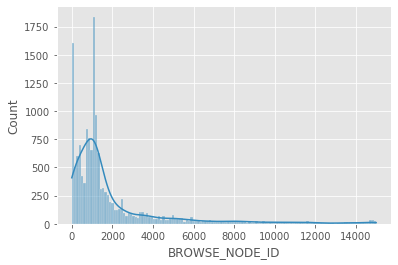

In [14]:
# count of browse node ID

sns.histplot(df.BROWSE_NODE_ID, kde=True)
plt.show()

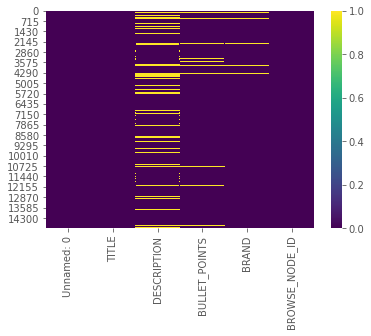

In [15]:
# heat map for null values in dataset

sns.heatmap(df.isnull(), cmap='viridis')

In [16]:
# cleaning the dataset

# deleting duplicate rows
df.drop_duplicates(inplace=True)

# dropping rows without title
df = df.dropna(axis=0, subset=['TITLE'])

# deleting special chars from TITLE, DESCRIPTION, BULLET_POINTS
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['TITLE'] = df['TITLE'].str.replace(char, ' ')
    df['DESCRIPTION'] = df['DESCRIPTION'].str.replace(char, ' ')
    df['BULLET_POINTS'] = df['BULLET_POINTS'].str.replace(char, ' ')
  
df['TITLE'] = df['TITLE'].str.split().str.join(" ")
df['DESCRIPTION'] = df['DESCRIPTION'].str.split().str.join(" ")
df['BULLET_POINTS'] = df['BULLET_POINTS'].str.split().str.join(" ")

# convert TITLE, DESCRIPTION, BULLET_POINTS, BRAND to lower case
df['TITLE'] = df['TITLE'].str.lower()
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()
df['BULLET_POINTS'] = df['BULLET_POINTS'].str.lower()
df['BRAND'] = df['BRAND'].str.lower()

# Replace NaN values in description, bullet points, brands
df['DESCRIPTION'] = df['DESCRIPTION'].replace(np.nan, '')
df['BULLET_POINTS'] = df['BULLET_POINTS'].replace(np.nan, '')
df['BRAND'] = df['BRAND'].replace(np.nan, '')

# Removing rows without description, bullet points, brands
indexNames = df[(df['DESCRIPTION'] == '') & (df['BULLET_POINTS'] == '') & (df['BRAND'] == '')].index
df.drop(indexNames , inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14713 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      14713 non-null  int64 
 1   TITLE           14713 non-null  object
 2   DESCRIPTION     14713 non-null  object
 3   BULLET_POINTS   14713 non-null  object
 4   BRAND           14713 non-null  object
 5   BROWSE_NODE_ID  14713 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 804.6+ KB


In [18]:
# finalizing the data to be processed

df['data'] = df['DESCRIPTION'].str.cat(df['BULLET_POINTS'], sep =" ")
df['data'] = df['BRAND'].str.cat(df['data'], sep =" ")
df['data'] = df['TITLE'].str.cat(df['data'], sep =" ")

In [19]:
df.head()

,Unnamed: 0,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,data
0,0,pete the cat bedtime blues doll 14.5 inch,pete the cat is the coolest most popular cat i...,pete the cat bedtime blues plush doll based on...,merrymakers,0,pete the cat bedtime blues doll 14.5 inch merr...
1,1,the new yorker nyhm014 refrigerator magnet 2 x...,the new yorker handsome cello wrapped hard mag...,cat in a tea cup by new yorker cover artist gu...,the new yorker,1,the new yorker nyhm014 refrigerator magnet 2 x...
2,2,the ultimate self sufficiency handbook a compl...,,skyhorse publishing,imusti,2,the ultimate self sufficiency handbook a compl...
3,3,amway nutrilite kids chewable iron tablets 100,,nutrilite kids chewable iron tablets quantity ...,amway,3,amway nutrilite kids chewable iron tablets 100...
5,5,men s full sleeve raglan t shirts denim t shir...,men s full sleeve raglan t shirts denim t shir...,color blue sleeve full sleeve material cotton ...,bhavya enterprise,5,men s full sleeve raglan t shirts denim t shir...


In [20]:
# # lemmatizing data

# # tokening data
# df['tokenized'] = df['data'].apply(word_tokenize)

# # removing stop words from tokenized data
# stop_words = set(stopwords.words('english'))
# df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

# # determining part of speech for each word
# df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

# # converting parts of speech tags to wordnet’s format
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# # applying NLTK’s word lemmatizer
# wnl = WordNetLemmatizer()
# df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# # convert lemmatized array to string
# df['final_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]

# # dropping extra unwanted columns
# df.drop(['tokenized', 'data', 'stopwords_removed', 'pos_tags', 'wordnet_pos', 'lemmatized'], axis='columns', inplace=True)

In [21]:
# stemming

# tokening data
df['tokenized'] = df['data'].apply(word_tokenize)

# removing stop words from tokenized data
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['stopwords_removed']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed'] = df.apply(stem_list, axis=1)

# convert stemmed array to string
df['final_str'] = [' '.join(map(str,l)) for l in df['stemmed']]

# dropping extra unwanted columns
df.drop(['tokenized', 'data', 'stopwords_removed', 'stemmed'], axis='columns', inplace=True)

In [22]:
# creating tfidf vectors for final_str

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['final_str'])
df['vect'] = list(x.toarray())

In [23]:
df.head()

,Unnamed: 0,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,final_str,vect
0,0,pete the cat bedtime blues doll 14.5 inch,pete the cat is the coolest most popular cat i...,pete the cat bedtime blues plush doll based on...,merrymakers,0,pete cat bedtim blue doll 14.5 inch merrymak p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,the new yorker nyhm014 refrigerator magnet 2 x...,the new yorker handsome cello wrapped hard mag...,cat in a tea cup by new yorker cover artist gu...,the new yorker,1,new yorker nyhm014 refriger magnet 2 x 3.5 new...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,the ultimate self sufficiency handbook a compl...,,skyhorse publishing,imusti,2,ultim self suffici handbook complet guid bake ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,amway nutrilite kids chewable iron tablets 100,,nutrilite kids chewable iron tablets quantity ...,amway,3,amway nutrilit kid chewabl iron tablet 100 amw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,men s full sleeve raglan t shirts denim t shir...,men s full sleeve raglan t shirts denim t shir...,color blue sleeve full sleeve material cotton ...,bhavya enterprise,5,men full sleev raglan shirt denim shirt size b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
# splitting the model into 80% training and 20% testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['vect'].tolist(), df['BROWSE_NODE_ID'].tolist(), test_size=0.2, random_state=0)

In [25]:
# deploying LinearSVC

from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Using Linear SVC:", accuracy_score(y_test, y_pred) * 100)

Using Linear SVC: 55.52157662249405


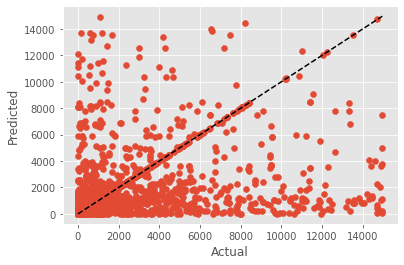

In [26]:
# plotting actual vs predicted browse node ID

fig,ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

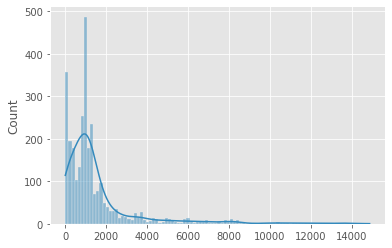

In [27]:
# count of predicted browse node ID

sns.histplot(y_pred, kde=True)
plt.show()

In [28]:
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))